# Dataset & Memilih Kolom 2 hingga 4 sebagai Input Features

In [30]:
import pandas as pd

# Memuat data dari file CSV
file_path = 'Customer - Customer.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari data
data.head()

# Memilih kolom ke-2 hingga ke-4
features = data.iloc[:, 2:5]

# Menampilkan beberapa baris pertama dari fitur yang dipilih
features.head()

,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,23,87,29
1,60,4,30
2,21,73,30
3,53,4,33
4,18,92,33


# Metode Elbow untuk Menentukan Jumlah Cluster yang Tepat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

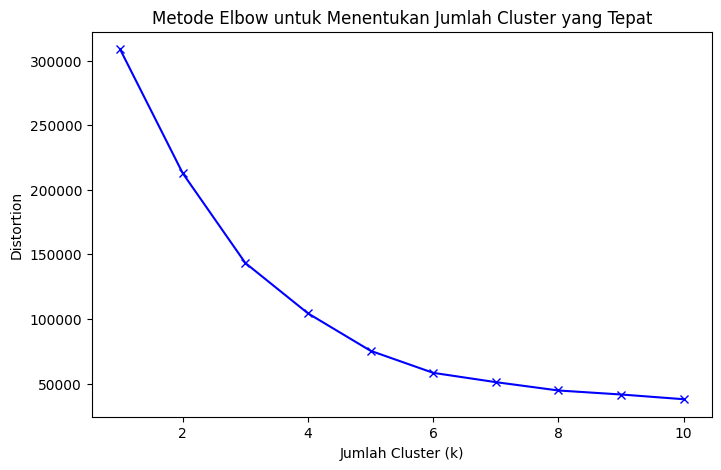

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menghitung distortions untuk berbagai jumlah cluster
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

# Plotting metode elbow
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Distortion')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster yang Tepat')
plt.show()

# K-Means Clustering & Hasil Analisis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   IDPelanggan    Kelamin  Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
0            1  Perempuan    23                      87                    29   
1            2       Laki    60                       4                    30   
2            3  Perempuan    21                      73                    30   
3            4       Laki    53                       4                    33   
4            5       Laki    18                      92                    33   

   Cluster  
0        1  
1        4  
2        1  
3        4  
4        1  


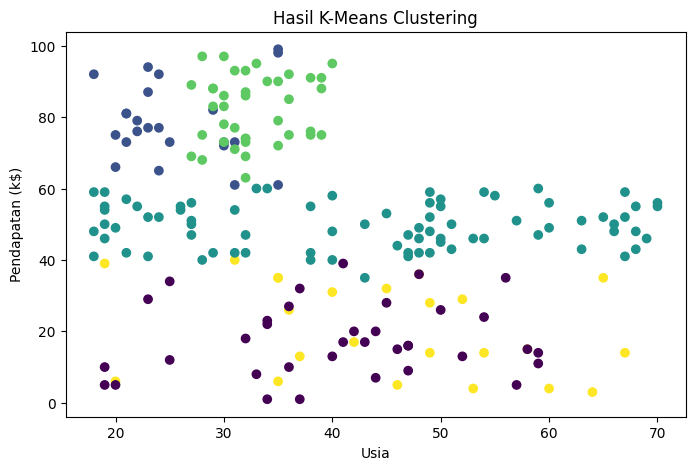

In [32]:
# Menggunakan 5 cluster (dari hasil elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features)

# Menambahkan hasil clustering ke dalam data asli
data['Cluster'] = clusters

# Menampilkan beberapa baris dari data yang telah ditambahkan hasil clustering
print(data.head())

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c=clusters, cmap='viridis', marker='o')
plt.xlabel('Usia')
plt.ylabel('Pendapatan (k$)')
plt.title('Hasil K-Means Clustering')
plt.show()

# Dendrogram untuk Menentukan Jumlah Cluster yang Tepat

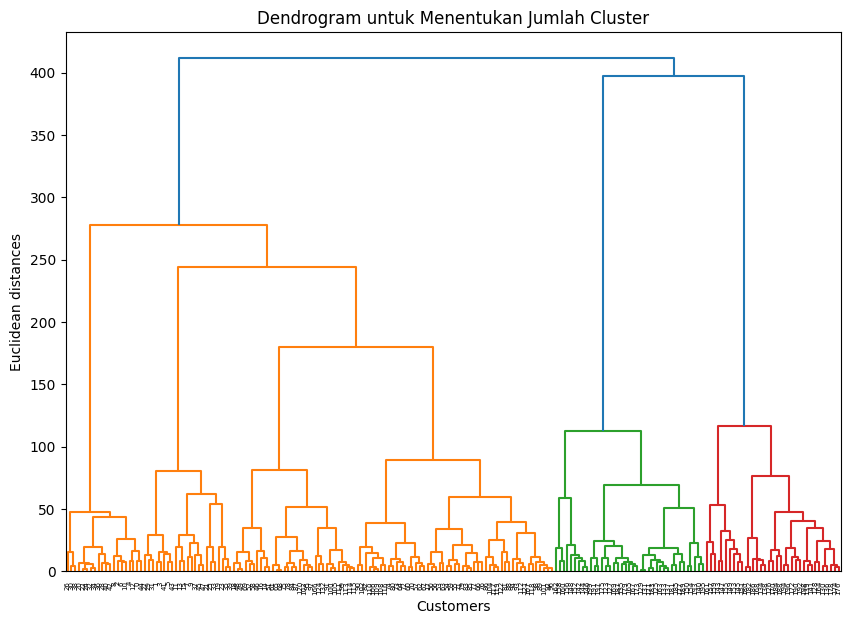

In [36]:
import scipy.cluster.hierarchy as sch

# Membuat dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.title('Dendrogram untuk Menentukan Jumlah Cluster')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Hierarchical Clustering dan Hasil Analisis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   IDPelanggan    Kelamin  Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
0            1  Perempuan    23                      87                    29   
1            2       Laki    60                       4                    30   
2            3  Perempuan    21                      73                    30   
3            4       Laki    53                       4                    33   
4            5       Laki    18                      92                    33   

   Cluster  HC_Cluster  
0        1           3  
1        4           4  
2        1           3  
3        4           4  
4        1           3  


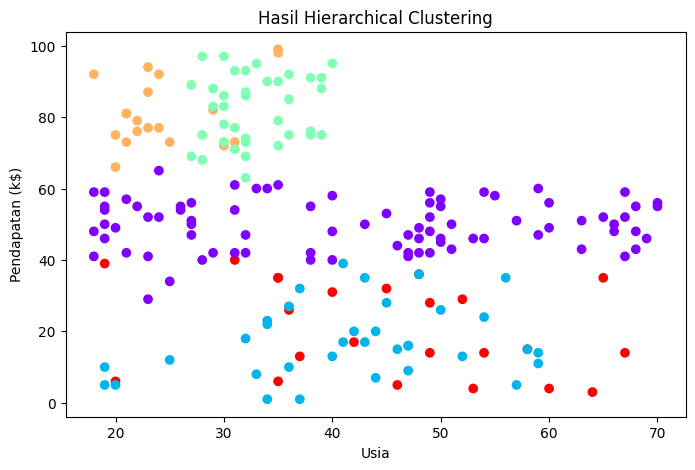

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Menggunakan 5 cluster (dari hasil dendrogram)
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(features)

# Menambahkan hasil clustering ke dalam data asli
data['HC_Cluster'] = hc_clusters

# Menampilkan beberapa baris dari data yang telah ditambahkan hasil clustering
print(data.head())

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c=hc_clusters, cmap='rainbow', marker='o')
plt.xlabel('Usia')
plt.ylabel('Pendapatan (k$)')
plt.title('Hasil Hierarchical Clustering')
plt.show()

# Membandingkan Hasil K-Means dan Hierarchical Clustering

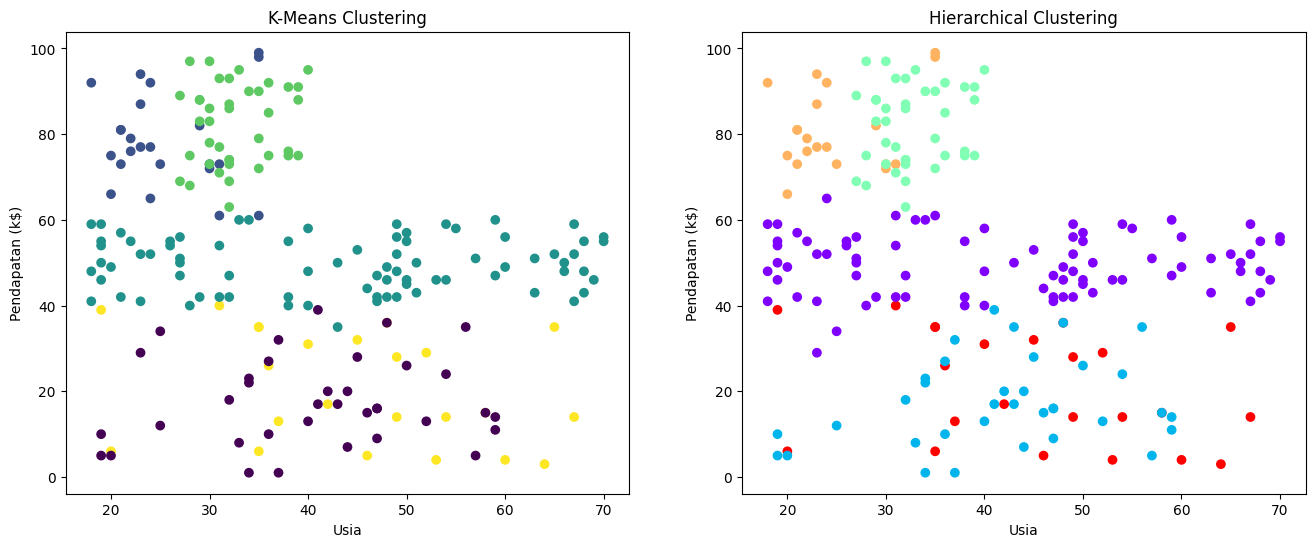

In [35]:
# Membandingkan hasil clustering dengan menggunakan visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Hasil K-Means clustering
ax1.scatter(data.iloc[:, 2], data.iloc[:, 3], c=data['Cluster'], cmap='viridis', marker='o')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('Usia')
ax1.set_ylabel('Pendapatan (k$)')

# Hasil Hierarchical clustering
ax2.scatter(data.iloc[:, 2], data.iloc[:, 3], c=data['HC_Cluster'], cmap='rainbow', marker='o')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('Usia')
ax2.set_ylabel('Pendapatan (k$)')

plt.show()

**Setelah melakukan clustering dengan K-Means dan Hierarchical Clustering, saya dapat mengamati perbedaan dalam pengelompokan pelanggan. K-Means clustering membagi data ke dalam cluster berdasarkan minimisasi inertia (sum of squared distances), yang cenderung menghasilkan cluster yang berbentuk bulat dan dengan ukuran yang seragam. Di sisi lain, Hierarchical Clustering membagi data berdasarkan jarak hierarki menggunakan metode ward, yang dapat mengidentifikasi cluster dengan bentuk dan ukuran yang lebih bervariasi. Hasil visualisasi menunjukkan bahwa kedua metode dapat mengelompokkan data ke dalam beberapa cluster yang berbeda, namun komposisi dan batasan antara cluster mungkin berbeda. Ini memberikan wawasan tambahan tentang struktur data dan memungkinkan department store untuk memilih metode yang paling sesuai berdasarkan tujuan spesifik mereka dan interpretasi yang diinginkan dari hasil clustering.**